In [1]:
from utils import *
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Segoe UI Symbol','simHei','Arial','sans-serif']

## Load Data

In [2]:
years = [2016,2017]
resampling_period = '60T'

original_data = load_resample_data(years, resampling_period)
windfarms_names = original_data.columns.tolist() 

windfarms = pd.read_excel('NRGstreamData/WindFarms.xlsx').sort_values(by='Asset ID').reset_index(drop = True)
labels = original_data.columns[-20:]

original_data.head()

year:2016	(105408, 20)
year:2017	(105120, 20)
resampled to  (17544, 20)


,AKE1,ARD1,BSR1,BTR1,BUL1,BUL2,CR1,CRE3,CRR1,GWW1,HAL1,IEW1,IEW2,KHW1,NEP1,OWF1,SCR2,SCR3,SCR4,TAB1
DT,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,62.75,55.83,53.75,47.33,10.00,13.83,37.17,21.17,54.92,64.67,146.25,34.25,24.67,55.92,55.17,41.50,27.58,28.17,81.42,41.75
2016-01-01 01:00:00,56.83,46.50,83.75,36.75,10.00,14.00,37.75,20.25,49.25,59.42,145.08,30.83,22.42,53.67,63.75,41.42,26.25,26.50,83.08,44.58
2016-01-01 02:00:00,59.08,43.58,65.50,36.50,10.00,12.58,37.50,20.75,45.58,50.25,145.17,28.50,17.33,49.67,59.92,39.33,26.50,27.25,83.17,55.25
2016-01-01 03:00:00,64.50,43.00,87.92,43.25,10.00,11.58,33.50,19.33,38.00,43.58,145.83,21.75,11.83,48.00,51.83,40.25,26.83,29.33,75.42,65.58
2016-01-01 04:00:00,63.25,44.00,121.33,44.08,10.00,11.17,36.17,18.00,36.58,49.33,139.25,21.92,15.00,52.25,50.17,40.17,24.25,29.75,63.08,63.58


In [3]:
pairwise_dist = np.array([[dist_two_points(windfarms.iloc[i][3],windfarms.iloc[i][2],windfarms.iloc[j][3],windfarms.iloc[j][2])
                      for i in range(0,20)] for j in range(0,20)])

## To calculate pairwise_dist_UpperMat, I wrote 3 codes:

## @ ONE: I first wrote the following codes (now are commented): These codes generate lists of list
## So, I needed to use itertools to convert it to one list of lenght 190. 
## Also, please note the order of i and j (which should be different). Note there is one more [] in the line below 
# pairwise_dist_UpperMat = [[dist_two_points(windfarms.iloc[i][3],windfarms.iloc[i][2],windfarms.iloc[j][3],windfarms.iloc[j][2])
#                       for i in range(j+1,20)] for j in range(0,20)]
# import itertools
# pairwise_dist_UpperMat = list(itertools.chain.from_iterable(pairwise_dist_UpperMat))

## @ TWO: The following code seems fastest, but I like the @ Three
# iu1 = np.triu_indices(len(labels),1)
# pairwise_dist_UpperMat2=pairwise_dist[iu1]
# pairwise_dist_UpperMat == pairwise_dist_UpperMat2

## @ Three
pairwise_dist_UpperMat = [dist_two_points(windfarms.iloc[i][3],windfarms.iloc[i][2],windfarms.iloc[j][3],windfarms.iloc[j][2])
                          for j in range(0,20) for i in range(j+1,20)] #note the order of i and j (which should be opposite)
len(pairwise_dist_UpperMat)

190

C:\Users\mabag\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


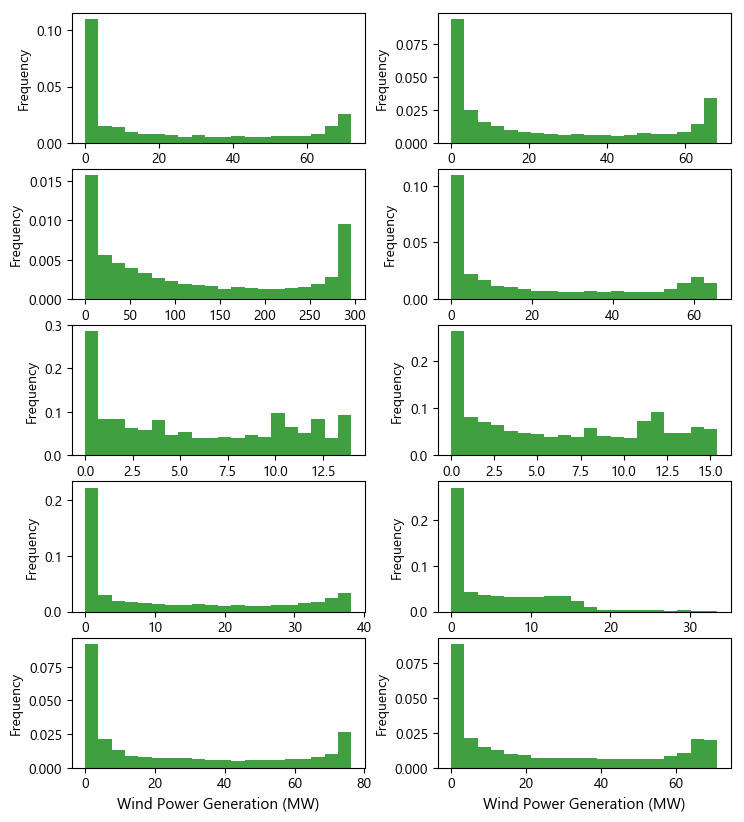

In [6]:
data_here = original_data 
total_plots = 10
n_rows = 5 ; figsize_r = 10
n_cols = 2 ; figsize_c = 8.5
n_plots = n_rows * n_cols

Title = ' Hist_of_operation'
savefig = 0

for p in range(int(-(-total_plots//n_plots))):
    fig, axar = plt.subplots(n_rows, n_cols,figsize=(figsize_c,figsize_r), dpi=100)
    fig.subplots_adjust(hspace=0.2, wspace=0.25)        

    ind = 0
    for i in range(n_plots*p,min(n_plots*(p+1),total_plots)):

        if n_cols ==1:
            ax = axar[ind]
        elif n_cols > 1:
            r = ind // n_cols
            c = ind % n_cols
            ax = axar[r, c]    

#         ax.set_xmargin(0)
#         ax.set_ymargin(0)

        ax.hist(original_data[labels[i]], 20, density=1, facecolor='green', alpha=0.75)
        ax.set_ylabel('Frequency')
        
#         ax.set_xmargin(0)
#         ax.set_ymargin(0)

#         fig.tight_layout()
        
        if r == n_rows-1:
            ax.set_xlabel('Wind Power Generation (MW)',fontsize=11)

        if savefig:
            fig.savefig(Title+str(p)+'.pdf', papertype='letter', dpi = 300, bbox_inches='tight')    

        ind = ind + 1

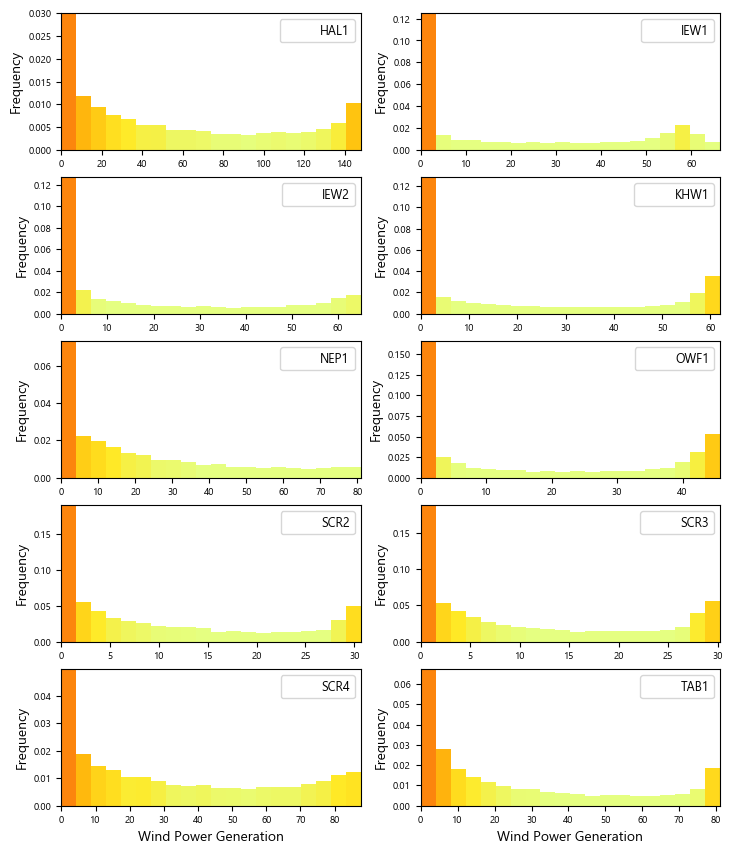

In [8]:
# fig, axar = plt.subplots(n_rows, n_cols,figsize=(figsize_c,figsize_r), dpi=100)
# fig.subplots_adjust(hspace=0.35, wspace=0.2)        
from matplotlib import colors

plt.figure(num=None, figsize=(8.5, 10.5), dpi=100, facecolor='w', edgecolor='k')
a=10
for i in (range(0+a,10+a)):
    plt.subplot(5,2,i+1-a)
    ax = plt.gca()
    # ax.set_xmargin(0)
    n, bins, patches = plt.hist(original_data[labels[i]], 20, density=1, facecolor='w', alpha=0.95)
    
    plt.ylabel('Frequency')
    plt.tick_params(labelsize = 7)
    plt.legend([labels[i]],fontsize=9) #labels[i],loc='upper right')
    plt.margins(0.0)
    if i==8+a or i==9+a:
        plt.xlabel('Wind Power Generation')
        
    # We'll color code by height, but you could use any scalar
    fracs = n / n.max()
    # we need to normalize the data to 0..1 for the full range of the colormap
    norm = colors.Normalize(0.1, 0.6)
    # Now, we'll loop through our objects and set the color of each accordingly
    for thisfrac, thispatch in zip(fracs, patches):
        color = np.array(plt.cm.Wistia(norm(thisfrac)))
        thispatch.set_facecolor(color)

# ax.yaxis.set_major_formatter(PercentFormatter(xmax=0.01,decimals=0))

    # plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='on')

    #plt.Axes.tick_params(direction='out', length=6, width=2, colors='r',grid_color='r', grid_alpha=0.5)
    #plt.grid(True)

# plt.savefig('Hist_of_operation-{}-{}-Wistia.pdf'.format(a,a+10), format='pdf',papertype='letter', dpi = 300, bbox_inches='tight')
# plt.show()`

1.0000000000000004
4.608566666666667
1160.0
252
1.0000000000000004
4.608566666666667
1305.0
283
1.0000000000000004
4.608566666666667
1377.5
299


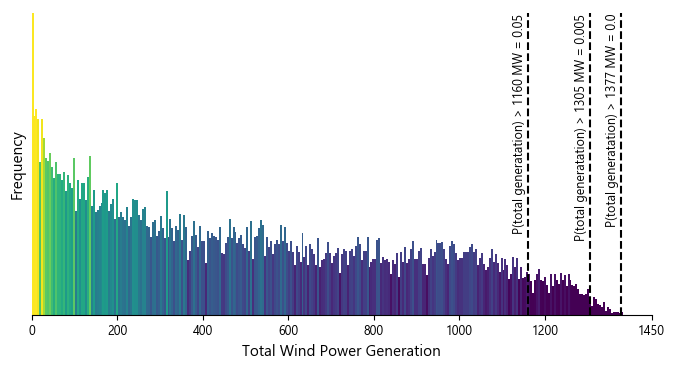

In [60]:
sum_all_wf_capacities = 1450

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

original_data['sum'] = original_data.iloc[:,-21:-1].sum(axis=1)
plt.figure(num=None, figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k')

ax = plt.gca()
n_bins = 300
n, bins, patches = plt.hist(original_data['sum'], n_bins,  facecolor='navy', alpha=1, density=True)

plt.xlabel('Total Wind Power Generation', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.tick_params(labelsize = 9)
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([0,200,400,600,800,1000,1200,sum_all_wf_capacities])
plt.xlim(0,sum_all_wf_capacities)
plt.margins(0.0)

c_t = sum_all_wf_capacities * 0.80
prob = find_prob(capacity_threshold = c_t) #threshold = 0.9,
plt.axvline(x=c_t, color='k', linestyle='--', ymax = 1)
ax.text(c_t - 20,ax.get_ylim()[1] , "P(total generatation) > {} MW = {}".format(round(int(c_t)),np.round(prob,3)), 
        size=9, rotation=90,va="top",ha='center')

c_t = sum_all_wf_capacities * 0.90
prob = find_prob(capacity_threshold = c_t) #threshold = 0.9,
plt.axvline(x=c_t, color='k', linestyle='--', ymax = 1)
ax.text(c_t - 20,ax.get_ylim()[1] , "P(total generatation) > {} MW = {}".format(round(int(c_t)),np.round(prob,3)), 
        size=9, rotation=90,va="top",ha='center')

c_t = sum_all_wf_capacities * 0.95
prob = find_prob(capacity_threshold = c_t) #threshold = 0.9,
plt.axvline(x=c_t, color='k', linestyle='--', ymax = 1)
ax.text(c_t - 20,ax.get_ylim()[1] , "P(total generatation) > {} MW = {}".format(round(int(c_t)),np.round(prob,3)), 
        size=9, rotation=90,va="top",ha='center')


# We'll color code by height, but you could use any scalar
fracs = n / (1.1 * n.max())
fracs[0] = fracs[1]
# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(0.1, 0.6)
# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = np.array(plt.cm.viridis(norm(thisfrac)))
    thispatch.set_facecolor(color)

# ax.yaxis.set_major_formatter(PercentFormatter(xmax=1,decimals=0))

plt.savefig('Hist_of_operation-sum-{}bins-colormap.jpg'.format(n_bins), format='jpg', dpi = 300, bbox_inches='tight')

In [41]:
0.005* 365*24

43.8

In [22]:
def find_prob(capacity_threshold = 1300):
    p = [patches[i].get_height() for i in range(0, n_bins)]
    w = patches[0].get_width()
    print(sum(p) * w)
    print(w)
    p_cs = np.cumsum(np.array(p) * w)
        
    #print(capacity_threshold)
    h = int(round(capacity_threshold / w))
    print(h)
    
    if h > len(p):
        prob = 0
    else:
        prob = 1 - np.round(p_cs[h],5)
    return prob

In [48]:
1-find_prob(capacity_threshold = 0.1 * 1450)

1.0000000000000004
4.608566666666667
145.0
31


0.22360999999999998

In [ ]:
# plt.figure(num=None, figsize=(20,6), dpi=100, facecolor='w', edgecolor='k')

# for i in range(20):#range(n_windfarms):
#     plt.plot(original_data[labels[i]][::100]) # plotting t, a separately 

# # plt.plot(original_data.iloc[:,1:][::100])    

# # Shrink current axis's height by 10% on the bottom
# #box = plt.get_position()
# #plt.set_position([box.x0, box.y0 + box.height * 0.1,
# #                 box.width, box.height * 0.9])

# ax = plt.subplot(111)

# # Shrink current axis's height by 10% on the bottom
# box = ax.get_position()
# ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                  box.width, box.height * 0.9])

# # Put a legend below current axis
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
#           fancybox=True, shadow=True, ncol=10, fontsize='x-large')

# # plt.savefig('Operation_plot.pdf', format='pdf',papertype='letter', dpi = 300)

In [61]:
corr_coeffs = np.corrcoef(np.transpose(original_data[labels]))
corr_coeffs_df = pd.DataFrame(corr_coeffs, index=labels)
corr_coeffs_df.columns = labels

iu1 = np.triu_indices(len(labels),1)
corr_coeffs_UpperMat=corr_coeffs[iu1]
len(corr_coeffs_UpperMat)

corr_coeffs_df.head(5)

,AKE1,ARD1,BSR1,BTR1,BUL1,BUL2,CR1,CRE3,CRR1,GWW1,HAL1,IEW1,IEW2,KHW1,NEP1,OWF1,SCR2,SCR3,SCR4,TAB1
AKE1,1.00,0.93,0.49,0.94,0.24,0.21,0.79,0.68,0.80,0.90,0.25,0.83,0.84,0.83,0.21,0.80,0.78,0.66,0.21,0.58
ARD1,0.93,1.00,0.45,0.89,0.25,0.22,0.75,0.65,0.77,0.93,0.25,0.80,0.80,0.83,0.21,0.77,0.79,0.65,0.22,0.56
BSR1,0.49,0.45,1.00,0.54,0.28,0.29,0.39,0.38,0.45,0.44,0.38,0.47,0.47,0.37,0.43,0.45,0.54,0.72,0.53,0.71
BTR1,0.94,0.89,0.54,1.00,0.25,0.23,0.76,0.67,0.79,0.85,0.27,0.82,0.83,0.79,0.22,0.78,0.78,0.70,0.24,0.62
BUL1,0.24,0.25,0.28,0.25,1.00,0.92,0.21,0.21,0.22,0.23,0.61,0.21,0.21,0.21,0.40,0.21,0.27,0.31,0.42,0.33


<Figure size 432x288 with 0 Axes>

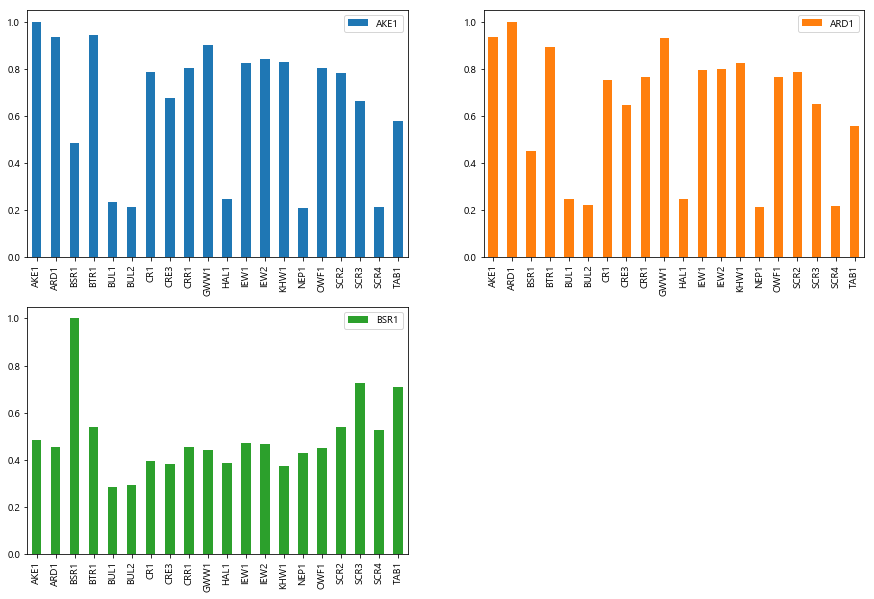

In [62]:
# plot the dataframe at once
plt.figure()
A = corr_coeffs_df.iloc[:,0:3].plot.bar(subplots=True, layout=(2,2), figsize=(15, 10), sharex=False, sharey=False,legend=True,
                                 title=['', '', ''])
# plt.tick_params(labelsize = 18)
# A.prod()

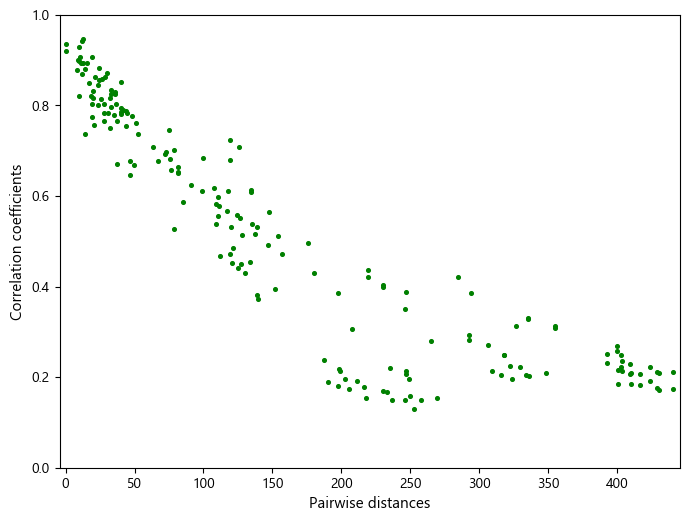

In [65]:
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(pairwise_dist_UpperMat,corr_coeffs_UpperMat, s=7, color = 'g')
# plt.title('Correlation coefficients of windfarms\' hourly supply vs. their pairwise distances')
plt.xlabel('Pairwise distances' , fontsize = 11)
plt.ylabel('Correlation coefficients', fontsize = 11)
plt.margins(0.01)
plt.ylim(0,1)

plt.savefig('correlation_vs_distance.jpg', papertype='letter', dpi = 300)

In [92]:
import scipy
def fit_func(x, a, b, c,d):
    return a*x**3 + b*x**2 + c*x + d

params = scipy.optimize.curve_fit(fit_func,pairwise_dist_UpperMat,corr_coeffs_UpperMat)
[a,b,c,d]= params[0]
x = np.linspace(0,450,num=1000)
y = fit_func(x,a,b,c,d)

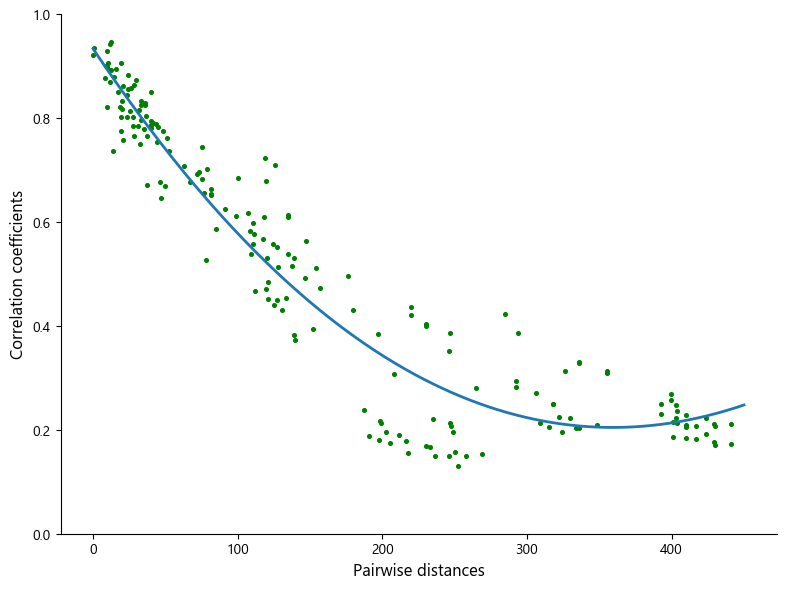

In [100]:
fig, ax = plt.subplots(figsize=(8,6),dpi=100)
ax.scatter(pairwise_dist_UpperMat,corr_coeffs_UpperMat, s=7, color = 'g')
ax.set_xlabel('Pairwise distances' , fontsize = 12)
ax.set_ylabel('Correlation coefficients', fontsize = 12)
# plt.margins(0.01)
ax.set_ylim(0,1)

ax.plot(x,y, lw = 2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
plt.savefig('correlation_vs_distance.jpg', papertype='letter', bbox_inches='tight', dpi = 300)

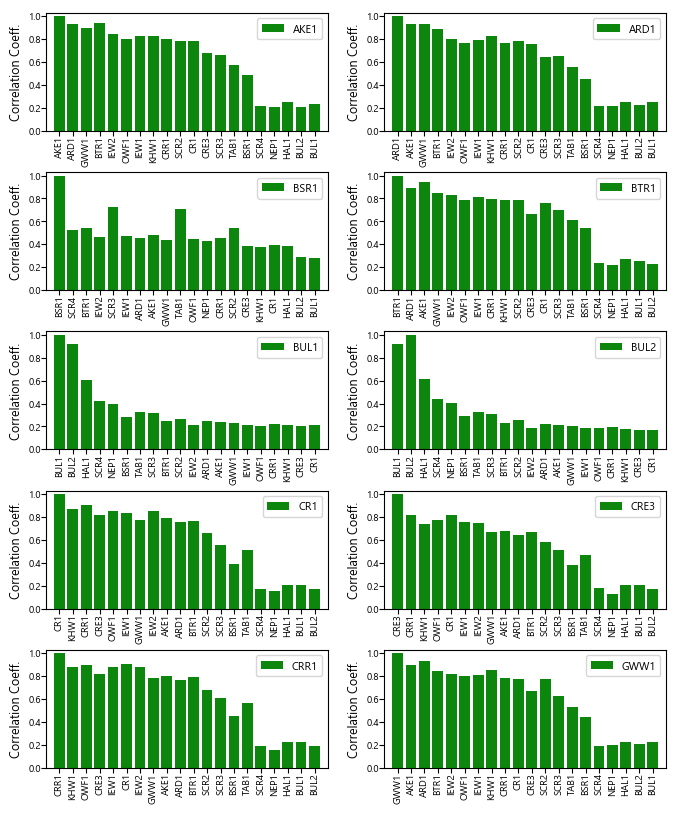

In [99]:
# plt.figure(num=None, figsize=(8.5, 20), dpi=100, facecolor='w', edgecolor='k')
fig, axes = plt.subplots(10, 2, figsize=(8, 10), dpi=100)
a = 0 
# a = 10
for i in (range(0+a,10+a)):
    
    plt.subplot(5,2,i+1-a)
    inds = pairwise_dist[:,i].argsort()
    temp_corr_coeffs = corr_coeffs[i,:]
    temp_corr_coeffs = temp_corr_coeffs[inds]
    plt.bar(range(0,20), temp_corr_coeffs, color='g', alpha=0.95)    
    #plt.xlabel('Power Supply')
    plt.ylabel('Correlation Coeff.', fontsize = 9)
    plt.tick_params(axis='both', labelsize = 7, which='major', pad=0)
    plt.legend([labels[i]],fontsize=8)#labels[i],loc='upper right')
    plt.xticks(range(0,20),np.array(labels)[inds],rotation='vertical') # ha='left'
    
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.03)
    # Tweak spacing to prevent clipping of tick-labels
    plt.subplots_adjust(hspace=0.35) #bottom=0.15, top = 0.9, 

plt.savefig('correlation_in_Hists-{}-{}.jpg'.format(a,a+10) ,papertype='letter', dpi = 300,bbox_inches='tight')
plt.show()